컨볼루션(합성곱)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
a = np.array([1, 3, 1]) # 필터
a

array([1, 1])

In [6]:
# np.convolve(x, a) 
np.convolve(x, a[::-1]) # 필터의 좌우를 뒤집기

array([ 0,  1,  3,  5,  7,  9, 11, 13, 15, 17,  9])

In [12]:
x = np.cos(np.arange(1, 10, 0.1))
# a = np.array([8, 9, 10, 9, 8]) / 10
a = np.array([0.3, 0.1, -0.1, -0.3])

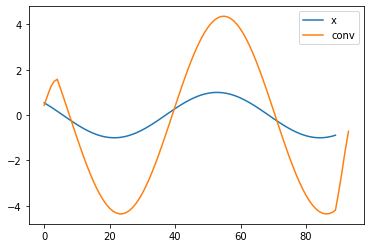

In [11]:
plt.plot(x, label='x')
plt.plot(np.convolve(x, a), label='conv')
plt.legend()

In [13]:
import tensorflow as tf

In [14]:
x_4d = np.reshape(x, [1, 1, -1, 1]).astype(np.float32)

In [15]:
a = a.astype(np.float32)

In [16]:
x_4d.shape, a.shape

((1, 1, 90, 1), (4,))

In [29]:
x = tf.range(1, 10, dtype=tf.float32)
x = tf.reshape(x, [1, 1, -1, 1]) # (m, h, w, c)
kernel = tf.range(1, 3, dtype=tf.float32)
kernel_4d = tf.reshape(kernel, [1, 1, 1, -1]) #(h, w, c, m)
kernel_3d = tf.reshape(kernel, [1, 1, -1])
x, kernel_3d, kernel_4d

(<tf.Tensor 'Reshape_7:0' shape=(1, 1, 9, 1) dtype=float32>,
 <tf.Tensor 'Reshape_9:0' shape=(1, 1, 2) dtype=float32>,
 <tf.Tensor 'Reshape_8:0' shape=(1, 1, 1, 2) dtype=float32>)

In [24]:
out = tf.nn.conv2d(x, kernel_4d, padding='SAME')

In [25]:
sess = tf.Session()

In [26]:
sess.run(x).reshape([-1])

array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [27]:
sess.run(kernel).reshape([-1])

array([1., 2.], dtype=float32)

In [28]:
sess.run(out).reshape([-1])

array([ 1.,  2.,  2.,  4.,  3.,  6.,  4.,  8.,  5., 10.,  6., 12.,  7.,
       14.,  8., 16.,  9., 18.], dtype=float32)

In [34]:
x = tf.range(1, 10)
x = tf.reshape(x, [1, 3, 3, 1]) # (m, h, w, c)

In [35]:
kernel = tf.ones([2, 2])
kernel = tf.reshape(kernel, (2, 2, 1, 1))
kernel

<tf.Tensor 'Reshape_11:0' shape=(2, 2, 1, 1) dtype=float32>

In [37]:
x = tf.cast(x, tf.float32)
kernel = tf.cast(kernel, tf.float32)
out = tf.nn.conv2d(x, kernel, padding='VALID')
out

<tf.Tensor 'Conv2D_2:0' shape=(1, 2, 2, 1) dtype=float32>

In [38]:
sess.run(out)

array([[[[12.],
         [16.]],

        [[24.],
         [28.]]]], dtype=float32)